### Collect imdb dataset
We’ll work with the IMDB dataset: a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.

In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [18]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [67]:
import numpy as np
import pandas as pd
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [3]:
train_data.shape,len(train_labels), test_data.shape, len(test_labels)

((25000,), 25000, (25000,), 25000)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()


In [7]:
num_to_word_map = {num:word for word, num in word_index.items()}

Decodes the review. Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”

In [8]:
decode_review = ' '.join([num_to_word_map.get(i-3,'?') for i in train_data[10]])

In [9]:
decode_review

"? french horror cinema has seen something of a revival over the last couple of years with great films such as inside and ? romance ? on to the scene ? ? the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made ? was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is ? by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named ? sent to prison for fraud he is put in a cell with three others the quietly insane ? body building ? marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old ? after ? part of it they soon realise its magical powers and realise they may be able to use it to break through the prison walls br br black mag

In [10]:
def vectorize_sequences(sequence, dimension=10000):
    results = np.zeros((len(sequence), dimension))
    for index, value in enumerate(sequence):
        results[index, value] = 1
    return results

In [11]:
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

In [126]:
# Building the model
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation ='sigmoid'))

In [127]:
# compile the model
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics =['accuracy'])

In [128]:
# validating our approach
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = train_labels[:10000]
partial_y_val = train_labels[10000:]

In [129]:
history = model.fit(partial_x_train, partial_y_val, batch_size=512, epochs=10, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 3s 199us/step - loss: 0.6142 - acc: 0.7025 - val_loss: 0.4971 - val_acc: 0.8472
Epoch 2/10
15000/15000 [==============================] - 1s 74us/step - loss: 0.4090 - acc: 0.8831 - val_loss: 0.3627 - val_acc: 0.8845
Epoch 3/10
15000/15000 [==============================] - 1s 74us/step - loss: 0.2804 - acc: 0.9184 - val_loss: 0.3429 - val_acc: 0.8661
Epoch 4/10
15000/15000 [==============================] - 1s 75us/step - loss: 0.2135 - acc: 0.9348 - val_loss: 0.2889 - val_acc: 0.8876
Epoch 5/10
15000/15000 [==============================] - 1s 77us/step - loss: 0.1684 - acc: 0.9481 - val_loss: 0.2754 - val_acc: 0.8904
Epoch 6/10
15000/15000 [==============================] - 1s 75us/step - loss: 0.1367 - acc: 0.9589 - val_loss: 0.2903 - val_acc: 0.8884
Epoch 7/10
15000/15000 [==============================] - 1s 76us/step - loss: 0.1128 - acc: 0.9668 - val_loss: 0.3851 - val_ac

In [130]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline

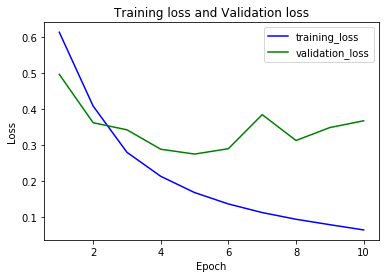

In [132]:
plt.plot(range(1,len(loss)+1), loss, 'b', label='training_loss')
plt.plot(range(1, len(val_loss)+1), val_loss, 'g', label='validation_loss')
plt.title('Training loss and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
# what matters for us more is green line.

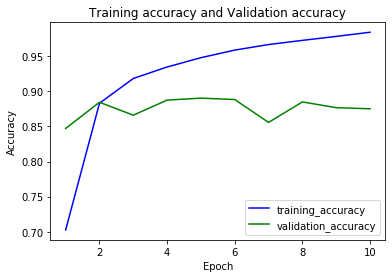

In [133]:
plt.plot(range(1, len(acc)+1), acc, 'b', label='training_accuracy')
plt.plot(range(1, len(val_acc)+1), val_acc, 'g', label='validation_accuracy')
plt.title('Training accuracy and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# what matters for us more is green line.

In [134]:
# Since our model is overfitted after epoch 4.
# we'll retrain out for 4 epoch, and will not use validation set this as we don't need validation now.
# i.e validation set is used to find the hyperparameters. and we have found one hyperparameter using val.data (epoch=4)
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation ='sigmoid'))

model.compile(optimizer = optimizers.RMSprop(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, train_labels, epochs=3, batch_size=512)
results = model.evaluate(x_test, test_labels)


Epoch 1/3
25000/25000 [==============================] - 3s 117us/step - loss: 0.5086 - acc: 0.7735
Epoch 2/3
25000/25000 [==============================] - 1s 50us/step - loss: 0.2797 - acc: 0.8944: 0s - loss: 0.2879 - acc: 
Epoch 3/3
25000/25000 [==============================] - 3s 138us/step


This fairly naive approach achieves an accuracy of 88%. With state-of-the-art approaches, we should be able to get close to 95%.

In [135]:
results

[0.30176416943073275, 0.88032]

In [136]:
experimental_df = pd.DataFrame({'h_layer':[2,], 'h_neuron':[16,], 'activation':['relu'],
                                'epoch':[4,], 'batch_size':[512], 'test_acc':['88%']})

In [137]:
experimental_df

,h_layer,h_neuron,activation,epoch,batch_size,test_acc
0,2,16,relu,4,512,88%
